# Part 3 Natural Language Processing

<img src="https://cdn.shortpixel.ai/client/q_glossy,ret_img/https://www.blumeglobal.com/wp-content/uploads/2018/11/NLP-image.jpg">

**Desired outcome of this notebook.**
* In this notebook we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (installation instructions can be found on the web page)

**NOTE**
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

# Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code:
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

## Modify the solution so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [1]:
import matplotlib.pylab as py

In [2]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess whether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# NOTE: we put the following in a 'if __name__ == "__main__"' protected
# block to be able to use a multi-core grid search that also works under
# Windows, see: http://docs.python.org/library/multiprocessing.html#windows
# The multiprocessing module is used as the backend of joblib.Parallel
# that is used when n_jobs != 1 in GridSearchCV

# the training data folder must be passed as first argument
movie_reviews_data_folder = 'txt_sentoken'
print("before loading")
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
pipeline = Pipeline([
    ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
    ('clf', LinearSVC(C=1000)),
])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
print(grid_search.cv_results_)

# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.predict(docs_test)

# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

# import matplotlib.pyplot as plt
# plt.matshow(cm)
# plt.show()

before loading
n_samples: 2000


C:\Users\randy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'mean_fit_time': array([1.1651512 , 3.69372829]), 'std_fit_time': array([0.30221352, 0.65311393]), 'mean_score_time': array([0.3021721 , 0.56665357]), 'std_score_time': array([0.01847111, 0.0418875 ]), 'param_vect__ngram_range': masked_array(data=[(1, 1), (1, 2)],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'vect__ngram_range': (1, 1)}, {'vect__ngram_range': (1, 2)}], 'split0_test_score': array([0.81437126, 0.84630739]), 'split1_test_score': array([0.804, 0.824]), 'split2_test_score': array([0.85170341, 0.85170341]), 'mean_test_score': array([0.82333333, 0.84066667]), 'std_test_score': array([0.02047363, 0.01198923]), 'rank_test_score': array([2, 1]), 'split0_train_score': array([1., 1.]), 'split1_train_score': array([1., 1.]), 'split2_train_score': array([1., 1.]), 'mean_train_score': array([1., 1.]), 'std_train_score': array([0., 0.])}
              precision    recall  f1-score   support

         neg       0.82      0.84      0.8

# Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

In [4]:
# Use the TfidVectorizer class to create features for the text documents
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1))
X=features.fit_transform(docs_train)

In [5]:
len(features.get_feature_names())

16071

In [6]:
# Use the TfidVectorizer class to create features for the text documents, but now allow 2-grams.
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,2))
X=features.fit_transform(docs_train)

In [7]:
len(features.get_feature_names())

63960

In [8]:
features.get_feature_names()

['00',
 '00 for',
 '000',
 '000 000',
 '000 feet',
 '000 leagues',
 '000 to',
 '000 years',
 '007',
 '10',
 '10 000',
 '10 10',
 '10 and',
 '10 but',
 '10 million',
 '10 minutes',
 '10 scale',
 '10 seconds',
 '10 the',
 '10 things',
 '10 when',
 '10 year',
 '10 years',
 '100',
 '100 000',
 '100 films',
 '100 million',
 '100 minute',
 '100 minutes',
 '1000',
 '101',
 '101 dalmatians',
 '102',
 '102 minute',
 '105',
 '105 minute',
 '106',
 '107',
 '108',
 '11',
 '11 year',
 '110',
 '115',
 '115 minutes',
 '12',
 '12 monkeys',
 '12 year',
 '129',
 '129 minutes',
 '13',
 '13 and',
 '13 for',
 '13 rating',
 '13 years',
 '130',
 '137',
 '13th',
 '13th warrior',
 '14',
 '14 year',
 '14 years',
 '14th',
 '15',
 '15 minutes',
 '15 year',
 '15 years',
 '150',
 '16',
 '16 year',
 '16 years',
 '1600',
 '16mm',
 '16x9',
 '16x9 televisions',
 '17',
 '17 for',
 '17 rating',
 '17 year',
 '17 years',
 '175',
 '17th',
 '17th century',
 '18',
 '18 guilderland',
 '180',
 '1800s',
 '1871',
 '18th',
 '18th 

# Machine learning algorithms


* Based upon the above section pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_test
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_test 
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_test**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

In [9]:
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1))
features.fit(docs_train)
Xtrain = features.transform(docs_train)
Xtest = features.transform(docs_test)

In [10]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [11]:
#classifier = LinearSVC()
classifier = KNeighborsClassifier()

In [12]:
classifier.fit(Xtrain,y_train)
y_predicted = classifier.predict(Xtest)

In [13]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [14]:
y_predicted

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

In [15]:
import matplotlib.pylab as py

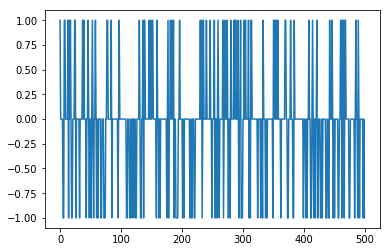

In [16]:
py.plot(y_test-y_predicted)

In [17]:
# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[147 102]
 [ 75 176]]


In [18]:
import numpy as np

In [19]:
# y_test=1 (is positive), but y_predicted=0 (is negative) 
print(np.array(docs_test)[ y_test-y_predicted == 1][0].decode())

the uncompromising nudity bared throughout petrice chereau's intimacy has already garnered much notoriety , but it's in the naked faces of fearless actors mark rylance ( angels & insects ) and kerry fox ( welcome to sarajevo ) that the tender ache of emotional resonance is discovered . 
with sharp , intelligent eyes that reflect experience and maturity , rylance and fox are refreshingly detached from the false glamour of hollywood idols . 
their sex scenes together are bracing in their raw honesty , in the acceptance of flesh and messiness . 
less apparent , but no less remarkable , are the astute observations of behavior revealed through those carnal beats of haste and hesitance , often without a single line of dialogue . 
not aiming for the spiritual poetry of in the realm of the senses or the philosophical transgressions of crash , chereau keeps his sexual odyssey firmly grounded in terms of straightforward character development . 
that may be the very reason why intimacy seems uner

In [20]:
# y_test=0 (is negative), but y_predicted=1 (is positive) 
print(np.array(docs_test)[ y_test-y_predicted == -1][0].decode())

this independent film written and directed by eric bross has the look and feel of all those other troubled blue-collar youth films that have inundated the market in recent times . 
it is hard to tell what is independent about this film ; it might as well have been made in hollywood or on a home videocam . 
it is the debut film for the director , who tells his personal story about italians growing up with heavy new jersey accents and remaining tight with each other as they grow into young adults , a tale which could have been rewarding to see in the 1950s , where the mind-set of all the characters depicted is grounded , but to see it in the 1990s is a different story : it is old news . 
the love story between the simple girl waiting to get married and her luckless boyfriend turning nasty on her doesn't mean much , since their relationship remained undeveloped . 
the introduction of the wise-guy angle and the loyality among buddies bit , are not moving enough emotional experiences or int

# Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I provide two examples below.
    * The first plots the length of the review versus the number of features we compute that are in that review
    * The second uses Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

In [21]:
x = np.array(list(map(len,docs_train)))
y = np.sum(Xtrain.toarray(),axis=1)

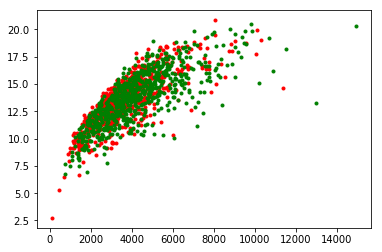

In [22]:
py.plot(x[y_train==0],y[y_train==0],'r.')
py.plot(x[y_train==1],y[y_train==1],'g.')

In [23]:
from sklearn.decomposition import PCA

In [24]:
# Note, capping the maximum number of features at 100 is very important.  If you try to run PCA
# on too many features then it may take a **long** time to run, or perhaps even run your machine 
# out of memory.
features = TfidfVectorizer(min_df=3, max_df=0.95, ngram_range=(1,1),max_features=100)
features.fit(docs_train)
Xtrain = features.transform(docs_train)
Xtest = features.transform(docs_test)

In [25]:
dimensionReducer = PCA(n_components=2)
Xhat = dimensionReducer.fit_transform(Xtrain.toarray())
Xhat.shape

(1500, 2)

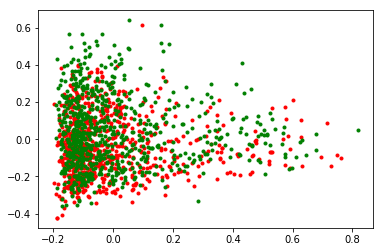

In [26]:
py.plot(Xhat[y_train==0,0],Xhat[y_train==0,1],'r.')
py.plot(Xhat[y_train==1,0],Xhat[y_train==1,1],'g.')